# The Qubit
The most general formula for a single qubit, $|\psi\rangle = \alpha|0\rangle +\beta|1\rangle$. $\alpha$ and $\beta$ are referred to as probability amplitudes meaning that they satisfy the following, $|\alpha|^2 + |\beta|^2 = 1$. 

Physically, this means that when $|\psi\rangle$ is measured in the $\{|0\rangle, \;|1\rangle\}$ basis, 
* 0 is measured with a probability of $|\alpha|^2$
* 1 is measured with a probability of $|\beta|^2$.

In [26]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
# Example state vector for a qubit
psi = [1/2**0.5, 1/2**0.5]  # Equal superposition state
# Create a Statevector object
statePsi = Statevector(psi)
# Display the state vector
display(array_to_latex(statePsi, prefix="|\\psi\\rangle ="))

# Lets create a new state vector with a different superposition
phi =[1/2**0.5, -1/2**0.5]
# Create a new Statevector object
statePhi = Statevector(phi)
# Display the updated state vector
display(array_to_latex(statePhi, prefix="|\\phi\\rangle ="))
# The amplitudes can also be complex numbers
# Example state vector with complex amplitudes
psi_complex = [1/2**0.5, 1j/2**0.5]  # Complex superposition state
# Create a Statevector object with complex amplitudes
statePsi_complex = Statevector(psi_complex)
# Display the complex state vector
display(array_to_latex(statePsi_complex, prefix="|\\psi_{\\text{complex}}\\rangle ="))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## The Bloch Sphere
The bloch vector allows us to parametrize a qubit via two real numbers, $|\psi\rangle = cos(\frac{\theta}{2})|0\rangle + e^{i\phi}sin(\frac{\theta}{2})|1\rangle$, where  $0\leq\theta\leq\pi/2$  is the angle made with the z-axis and  $0\leq\phi\leq2\pi$  is the angle made with the x-axis.

So you can think of a qubit as existing on the surface of the sphere

In the following cell, adjust the values of $\theta$ and $\phi$ to see the qubit on the bloch sphere.

<IPython.core.display.Latex object>

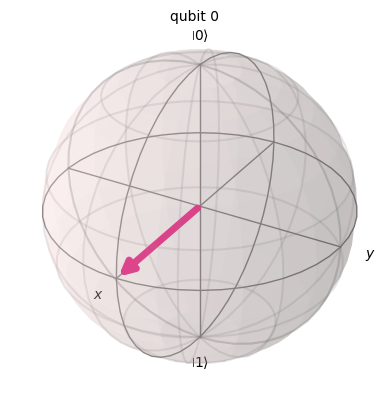

<IPython.core.display.Latex object>

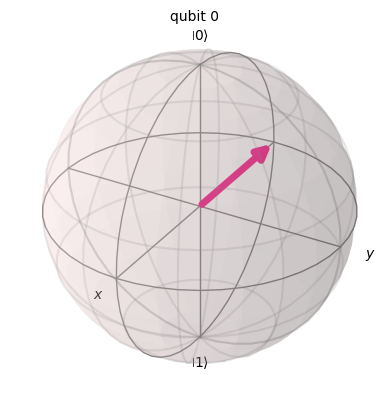

In [27]:
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector

# let us see what are states look like on the Bloch sphere

# state psi looks like
display(array_to_latex(statePsi, prefix="|\\psi\\rangle ="))
display(plot_bloch_multivector(statePsi))

# state phi looks like
display(array_to_latex(statePhi, prefix="|\\phi\\rangle ="))
display(plot_bloch_multivector(statePhi))

In [28]:
# The states have special names: plus and minus
# Copy the state vectors to plus and minus
plus = statePsi
minus = statePhi

# Display the plus and minus states
display(array_to_latex(plus, prefix="|+\\rangle ="))
display(array_to_latex(minus, prefix="|-\\rangle ="))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Since $|\alpha|^2 = |\beta|^2 = \frac{1}{2}$ for the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$, measuring the qubit in the $\{|0\rangle, |1\rangle\}$ basis will result in a 50-50 probability of observing either 0 or 1.

We can simulate this behavior using a quantum circuit and a simulator, as shown below. To run this on actual IBM hardware, you need to set up an account with IBM. This gives you approximately 10 minutes of time on an actual quantum computer each month. For more instructions, visit [IBM Quantum Cloud Setup Guide](https://quantum.cloud.ibm.com/docs/en/guides/cloud-setup). 

Here, we will just use simulation. The results will then reflect the simulator's behavior, which is ideal and free from noise or imperfections.

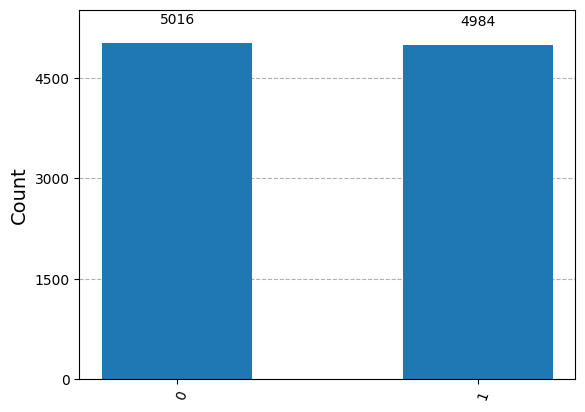

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit.library import Initialize
from qiskit.visualization import plot_histogram
# Create a quantum circuit with 1 qubit and 1 classical bit#
qc = QuantumCircuit(1, 1)

# Initialize the qubit to the plus state
# Note that using the minus state will also give you the same results
init = Initialize(plus)
qc.append(init, [0])

# Add a measurement
qc.measure(0, 0)

# Simulate the circuit 100 times
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=10000)
result = job.result()

# Get the counts of measurement outcomes
counts = result.get_counts()

# Display the results
display(plot_histogram(counts))



The states don't have to be 50-50. Let's try an arbitrary state where $\alpha = \frac{1}{5}$. Then, since $\beta^2 = 1 - \alpha^2$, we can compute $\beta$.


We can initialize and simulate this state in the quantum circuit, as shown in the following cell.


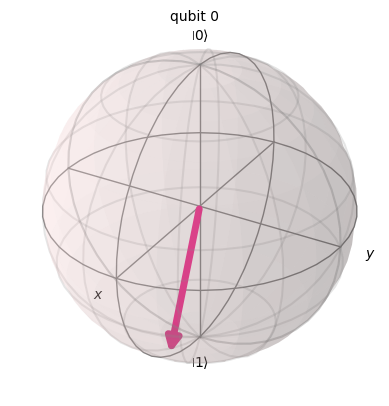

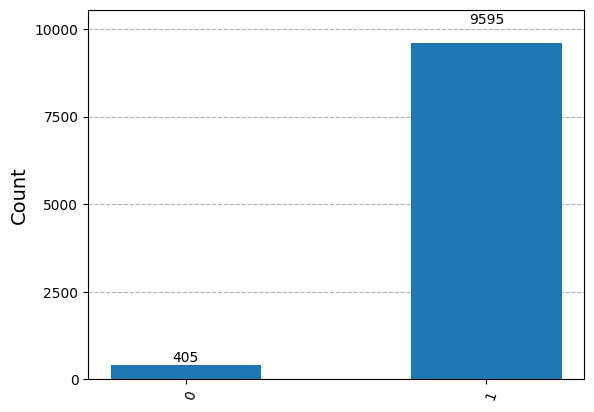

In [ ]:
# Define an arbitrary state vector

arbitrary_state = [1/5, np.sqrt(1-(1/5)**2)]  # |ψ⟩ = 0.6|0⟩ + 0.8|1⟩

# see what the arbitrary state looks like on the Bloch sphere
display(plot_bloch_multivector(arbitrary_state))
# Create a new quantum circuit
qc_arbitrary = QuantumCircuit(1, 1)

# Initialize the qubit to the arbitrary state
init_arbitrary = Initialize(arbitrary_state)
qc_arbitrary.append(init_arbitrary, [0])

# Add a measurement
qc_arbitrary.measure(0, 0)

# Simulate the circuit
job_arbitrary = backend.run(qc_arbitrary, shots=10000)
result_arbitrary = job_arbitrary.result()

# Get the counts of measurement outcomes
counts_arbitrary = result_arbitrary.get_counts()

# Display the results
display(plot_histogram(counts_arbitrary))

## Rotating a State Using Gates

Quantum gates are used to manipulate qubits and evolve their states. These gates are the classical equivalent of logic gates (AND, OR, NOT, etc) but operate on quantum bits (qubits).

Qubits evolve via Quantum Gates, i.e. 2x2 matrices. Some single qubit gates often encountered are shown below in the $\{|0\rangle, \;|1\rangle\}$ basis:

X = $\begin{bmatrix}   
 0 & 1 \\        
 1 & 0           
\end{bmatrix}$ Bit-Flip or NOT gate

Y = $\begin{bmatrix}   
 0 & -i \\        
 i & 0           
\end{bmatrix}$ Bit/Phase-Flip 

Z = $\begin{bmatrix}   
 1 & 0 \\        
 0 & -1           
\end{bmatrix}$ Phase-Flip   

H = $ \frac{1}{\sqrt{2}}\begin{bmatrix}   
 1 & 1 \\        
 1 & -1           
\end{bmatrix}$ Hadamard Gate (takes $|0\rangle$ to $|+\rangle$, $|1\rangle$ to $|-\rangle$, and vice versa)

The first 3 gates are known as the "Pauli Matrices" and have many significant properties. Below are known as the "Rotation Operator Gates" which rotate a state about the indicated axis on the bloch sphere.

$R_x$ = $\begin{bmatrix}   
 cos(\theta/2) & -i\;sin(\theta/2) \\        
 -i\;sin(\theta/2) & cos(\theta/2)           
\end{bmatrix}$ 

$R_y$ = $\begin{bmatrix}   
 cos(\theta/2) & -sin(\theta/2) \\        
 sin(\theta/2) & cos(\theta/2)           
\end{bmatrix}$ 

$R_z$ = $\begin{bmatrix}   
 e^{-i\;\theta/2} & 0 \\        
 0 &   e^{i\;\theta/2}         
\end{bmatrix}$ 

Let us see what applying these gates does to a quantum state

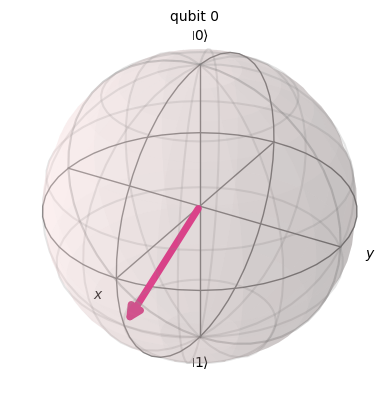

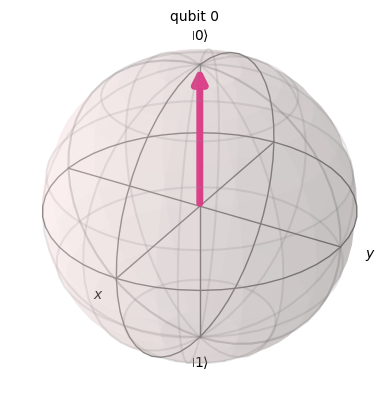

In [39]:
from qiskit.circuit.library import RYGate, HGate

# Create a quantum circuit for the plus state
qc_plus_rx = QuantumCircuit(1, 1)
qc_plus_rx.append(init, [0])  # Initialize to the plus state

# Apply an RX rotation (e.g., π/2 radians)
rx_gate = RYGate(np.pi/4 / 2)
qc_plus_rx.append(rx_gate, [0])

# Visualize the resulting state on the Bloch sphere
state_after_rx = Statevector.from_instruction(qc_plus_rx)
display(plot_bloch_multivector(state_after_rx))


# Apply a Hadamard gate to the plus state
qc_plus_h = QuantumCircuit(1, 1)
qc_plus_h.append(init, [0])  # Initialize to the plus state
qc_plus_h.append(HGate(), [0])  # Apply Hadamard gate

# Visualize the resulting state on the Bloch sphere
state_after_h = Statevector.from_instruction(qc_plus_h)
display(plot_bloch_multivector(state_after_h))
# Feel free to experiment with different angles and gates

# Measurement in Arbitrary Bases

In quantum mechanics, you are not restricted to measuring in the standard computational basis $\{|0\rangle, |1\rangle\}$. Instead, you can measure along any two kets that lie on opposite ends of the Bloch sphere. For example, you could measure in the $\{|+\rangle, |-\rangle\}$ basis, where:

* $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
* $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$

This flexibility allows you to extract information about the qubit's state in different bases, depending on the context of your quantum computation or experiment. The choice of measurement basis is crucial for tasks like state tomography, quantum algorithms, and error correction.

Below, lets measure $|+\rangle$ in the $|+\rangle $|-\rangle basis. Note that $|+\rangle$ makes to 0 and $|-\rangle$ to one on the histogram
```

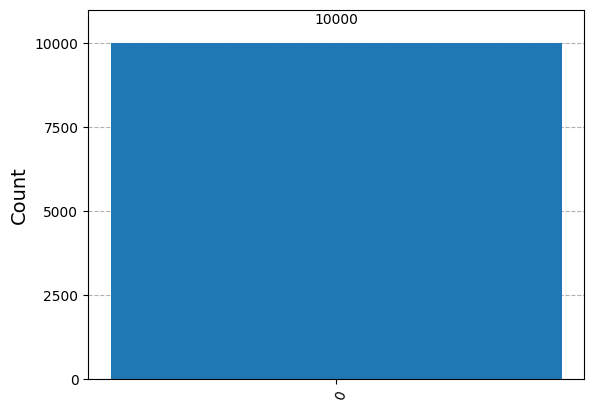

In [41]:
from qiskit.circuit.library import HGate

# Create a quantum circuit for the plus state
qc_plus_hadamard = QuantumCircuit(1, 1)
qc_plus_hadamard.append(init, [0])  # Initialize to the plus state
qc_plus_hadamard.append(HGate(), [0])  # Apply Hadamard gate
qc_plus_hadamard.measure(0, 0)  # Measure

# Simulate the circuit
job_plus_hadamard = backend.run(qc_plus_hadamard, shots=10000)
result_plus_hadamard = job_plus_hadamard.result()
counts_plus_hadamard = result_plus_hadamard.get_counts()

# Display the results for the plus state
display(plot_histogram(counts_plus_hadamard))

# Two-Qubit States

We will now explore two-qubit states, which allow us to study quantum entanglement and correlations between qubits. These states are represented in a 4-dimensional Hilbert space.

<IPython.core.display.Latex object>

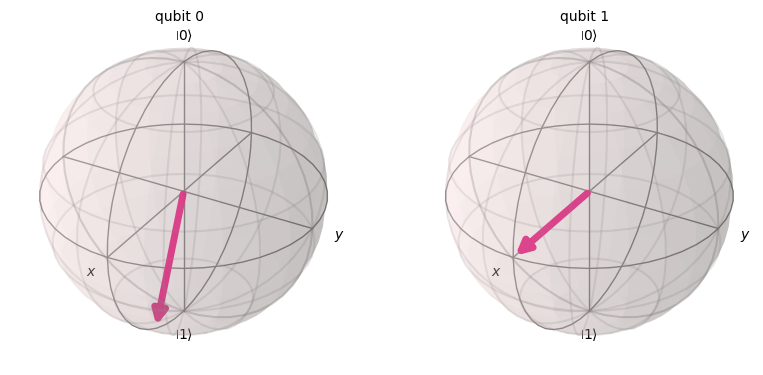

In [48]:
from qiskit.quantum_info import Statevector

# Create a two-qubit state where the first qubit is in the plus state and the second qubit is in an arbitrary state
two_qubit_plus_state = Statevector(plus).tensor(Statevector(arbitrary_state))
# Display the two-qubit state
display(array_to_latex(two_qubit_plus_state, prefix="|\\psi_{\\text{2-qubit}}\\rangle ="))
# The first element of the state vector is the amplitude of |00⟩, the second is |01⟩, and so on
# Here the two qubits are not entangled, so these amplitudes are simply the product of the individual qubit amplitudes
# To visualize the two-qubit state on the Bloch sphere, we can use the `plot_bloch_multivector` function
display(plot_bloch_multivector(two_qubit_plus_state))

## Measuring a Two-Qubit State

To measure a two-qubit state, we can use the `plus plus` state, which is a tensor product of two qubits in the $|+\rangle$ state. The measurement will be performed in the computational basis $|00\rangle, |01\rangle, |10\rangle, |11\rangle$.

The results will show the probabilities of observing each of these basis states after measurement. Below is the simulation of this measurement.

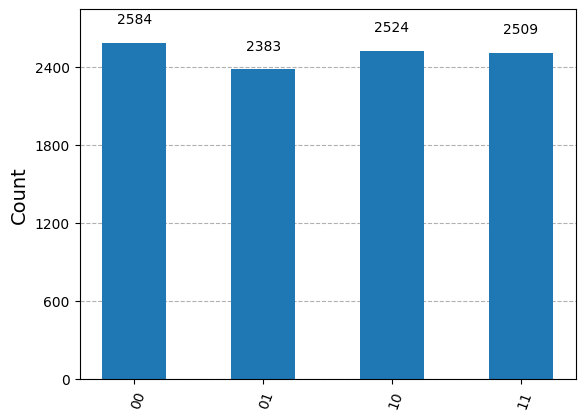

In [45]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 2 qubits and 2 classical bits
qc_plus_plus = QuantumCircuit(2, 2)

# Initialize both qubits to the plus state
qc_plus_plus.append(init, [0])  # First qubit
qc_plus_plus.append(init, [1])  # Second qubit

# Add measurements
qc_plus_plus.measure([0, 1], [0, 1])

# Simulate the circuit
job_plus_plus = backend.run(qc_plus_plus, shots=10000)
result_plus_plus = job_plus_plus.result()
counts_plus_plus = result_plus_plus.get_counts()

# Display the results
display(plot_histogram(counts_plus_plus))

## Entangled Two-Qubit States

Two qubits can also be entangled, meaning their states are no longer separable. In such cases, the state of each qubit cannot be described independently. Instead, the two qubits must be represented as a single, inseparable quantum state.

For example, the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ is an entangled state. Measuring one qubit immediately determines the state of the other, regardless of the distance between them. This phenomenon is a key feature of quantum mechanics and is central to quantum computing and quantum communication.


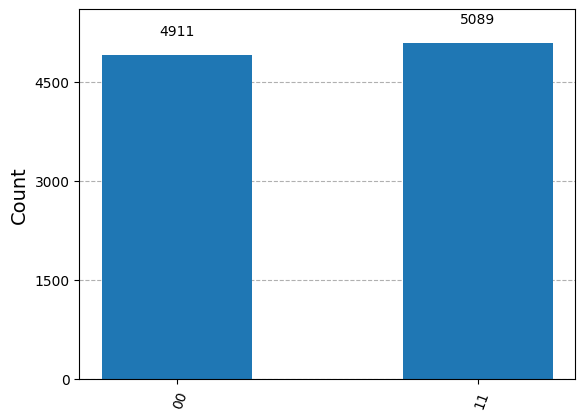

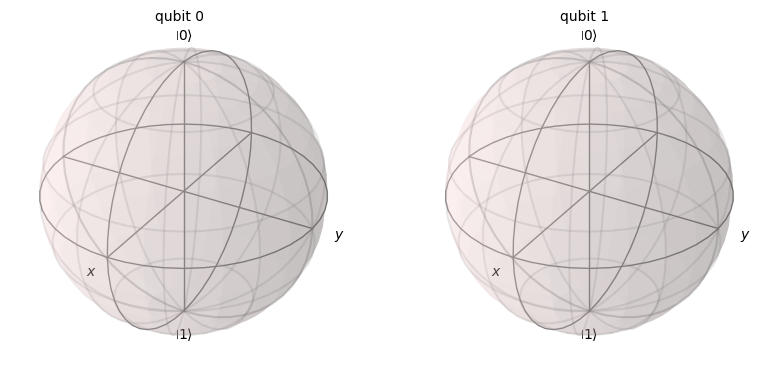

Error: 'Statevector' object has no attribute 'partial_trace'


In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 2 qubits and 2 classical bits
# Initialize the Bell state directly from a state vector
bell_state = [1/2**0.5, 0, 0, 1/2**0.5]  # |Φ+⟩ = (|00⟩ + |11⟩) / √2
qc_bell = QuantumCircuit(2, 2)
init_bell = Initialize(bell_state)
qc_bell.append(init_bell, [0, 1])
qc_bell.measure([0, 1], [0, 1])

# Simulate the circuit
job_bell = backend.run(qc_bell, shots=10000)
result_bell = job_bell.result()
counts_bell = result_bell.get_counts()

# Display the results
display(plot_histogram(counts_bell))

# Attempting to visualize the individual qubits on the Bloch sphere
# This will not work as the qubits are entangled and cannot be represented separately
display(plot_bloch_multivector(bell_state))